<a href="https://colab.research.google.com/github/shihabsami/CardGame/blob/master/Student_Dataset_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/shihabsami/MATH2350-CourseProject/main/Student_Dataset.csv?token=APCKF7L7D7P3XIKB3J7BDOK7SUHZ4"

# Read the dataset
df = pd.read_csv(url)

In [3]:
# Random sample
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
39,'GP','F',15,'R','GT3','T',2,2,'at_home','other','reputation','mother',1,1,0,'yes','yes','yes','yes','yes','yes','no','no',4,3,1,1,1,2,8,14,13,13
99,'GP','F',16,'U','GT3','T',4,3,'other','at_home','course','mother',1,3,0,'yes','yes','yes','no','yes','yes','yes','no',5,3,5,1,1,3,0,7,9,8
373,'MS','F',17,'R','GT3','T',1,2,'other','other','course','mother',1,1,0,'no','no','no','yes','yes','yes','yes','no',3,5,5,1,3,1,14,6,5,5
340,'GP','F',19,'U','GT3','T',2,1,'services','services','home','other',1,3,1,'no','no','yes','yes','yes','yes','yes','yes',4,3,4,1,3,3,4,11,12,11
252,'GP','M',18,'U','GT3','T',2,1,'services','services','other','mother',1,1,1,'no','no','no','no','no','no','yes','no',3,2,5,2,5,5,4,6,9,8
241,'GP','M',17,'R','LE3','A',4,4,'teacher','other','course','mother',2,2,0,'no','yes','yes','no','yes','yes','yes','no',3,3,3,2,3,4,2,10,11,12
248,'GP','M',18,'R','LE3','T',3,3,'other','services','course','mother',1,2,1,'no','yes','no','no','yes','yes','yes','yes',4,3,3,1,3,5,8,3,5,5
12,'GP','M',15,'U','LE3','T',4,4,'health','services','course','father',1,1,0,'no','yes','yes','yes','yes','yes','yes','no',4,3,3,1,3,5,2,14,14,14
153,'GP','M',19,'U','GT3','T',3,2,'services','at_home','home','mother',1,1,3,'no','yes','no','no','yes','no','yes','yes',4,5,4,1,1,4,0,5,0,0
306,'GP','M',20,'U','GT3','A',3,2,'services','other','course','other',1,1,0,'no','no','no','yes','yes','yes','no','no',5,5,3,1,1,5,0,17,18,18


In [4]:
# The shape of the dataset
df.shape

(395, 33)

In [5]:
# The data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
# Checking for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
# Describing discrete numerical features
df.describe(include='int64')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
# Categorical features
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,'GP','F','U','GT3','T','other','other','course','mother','no','yes','no','yes','yes','yes','yes','no'
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [9]:
# The data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
# Drop unnecessary features, bunch of these are useful but we drop them still since we already have our hands full
df.drop(
    [
    "school", "address", "famsize",
    "Medu", "Fedu", "Pstatus",
    "Mjob", "Fjob", "reason",
    "guardian", "traveltime", "activities",
    "nursery", "higher", "internet",
    "romantic", "famrel", "freetime",
    "goout", "Dalc", "Walc"
    ], axis = 1, inplace = True)

In [11]:
# After modifications
df.head(10)

,sex,age,studytime,failures,schoolsup,famsup,paid,health,absences,G1,G2,G3
0,'F',18,2,0,'yes','no','no',3,6,5,6,6
1,'F',17,2,0,'no','yes','no',3,4,5,5,6
2,'F',15,2,3,'yes','no','yes',3,10,7,8,10
3,'F',15,3,0,'no','yes','yes',5,2,15,14,15
4,'F',16,2,0,'no','yes','yes',5,4,6,10,10
5,'M',16,2,0,'no','yes','yes',5,10,15,15,15
6,'M',16,2,0,'no','no','no',3,0,12,12,11
7,'F',17,2,0,'yes','yes','no',1,6,6,5,6
8,'M',15,2,0,'no','yes','yes',1,0,16,18,19
9,'M',15,2,0,'no','yes','yes',5,0,14,15,15


In [12]:
# Feature explanation
# sex - student's sex (binary: 'F' - female or 'M' - male)
# age - student's age (numeric: from 15 to 22)
# studytime - weekly study time (numeric: 1 - <2>10 hours)
# failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# schoolsup - extra educational support (binary: yes or no)
# famsup - family educational support (binary: yes or no)
# paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# health - current health status (numeric: from 1 - very bad to 5 - very good)
# absences - number of school absences (numeric: from 0 to 93)
# G1 - first period grade (numeric: from 0 to 20)
# G2 - second period grade (numeric: from 0 to 20)
# G3 - final grade (numeric: from 0 to 20, output target)

In [13]:
# Rename a few feature names for better readability
df.rename(columns = {"schoolsup":"schoolsupport", "famsup":"familysupport", "paid":"paidclasses"}, inplace = True)

In [14]:
# Some aesthetic tweaking
sns.set_theme(context = "notebook", style = "whitegrid", palette = "autumn", font = "sans-serif", font_scale = 1, color_codes = True)
%matplotlib inline 
%config InlineBackend.figure_format = "retina"

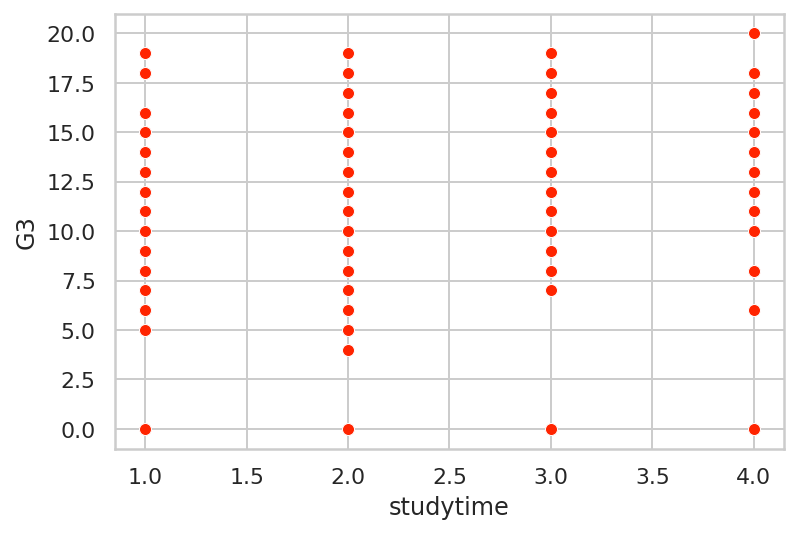

In [15]:
sns.scatterplot(data = df, x = "studytime", y = "G3")

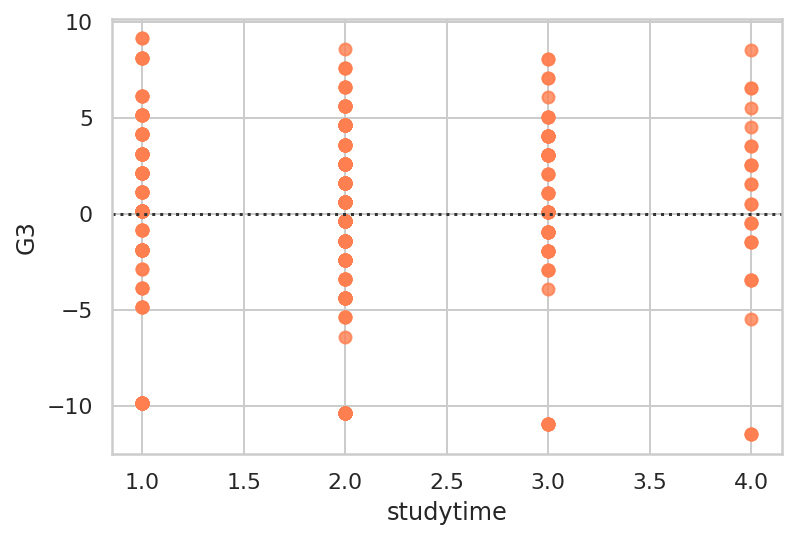

In [16]:
# Residuals plot
sns.residplot(x = "studytime", y = "G3", data = df, color = "coral")

In [17]:
# Categorical features in detail
categoricalFeatures = df.columns[df.dtypes == object].tolist()

for feature in categoricalFeatures:
    print(f"Unique values for \"{feature}\" are {df[feature].unique()}")

Unique values for "sex" are ["'F'" "'M'"]
Unique values for "schoolsupport" are ["'yes'" "'no'"]
Unique values for "familysupport" are ["'no'" "'yes'"]
Unique values for "paidclasses" are ["'no'" "'yes'"]


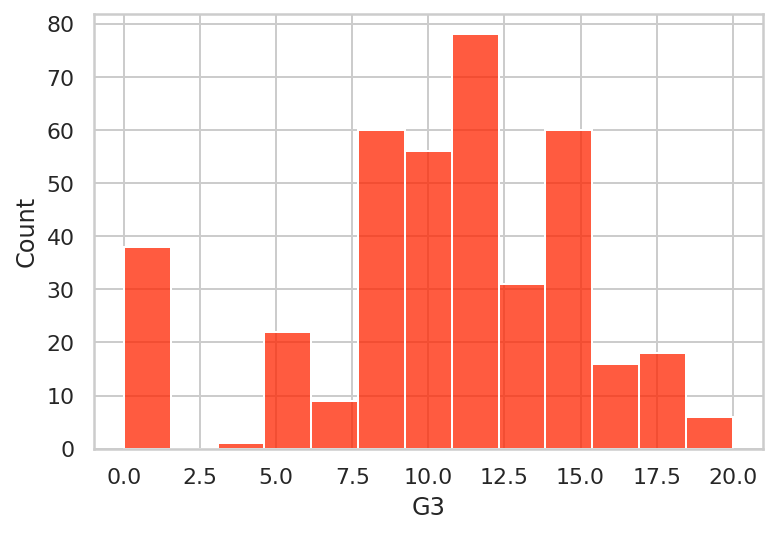

In [18]:
# A histogram of the response variable
sns.histplot(df["G3"])

In [19]:
# Checking distribution
df["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

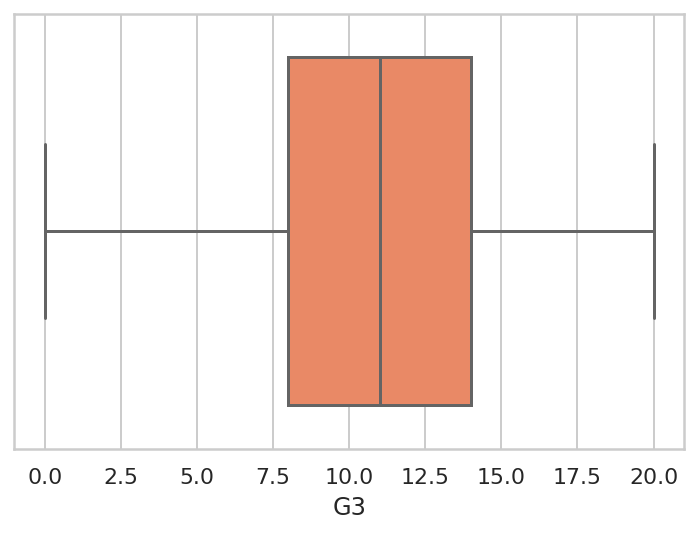

In [20]:
# Hmmm, insane amount of outliers in this boxplot
sns.boxplot(x = "G3", data = df, color = "coral", dodge=False)

In [21]:
# Some additional checking
Q1 = df["G3"].quantile(0.25)
Q3 = df["G3"].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
df["G3"][df["G3"] > upper_whisker]

Series([], Name: G3, dtype: int64)

In [22]:
# Okay, all data are within the IQR

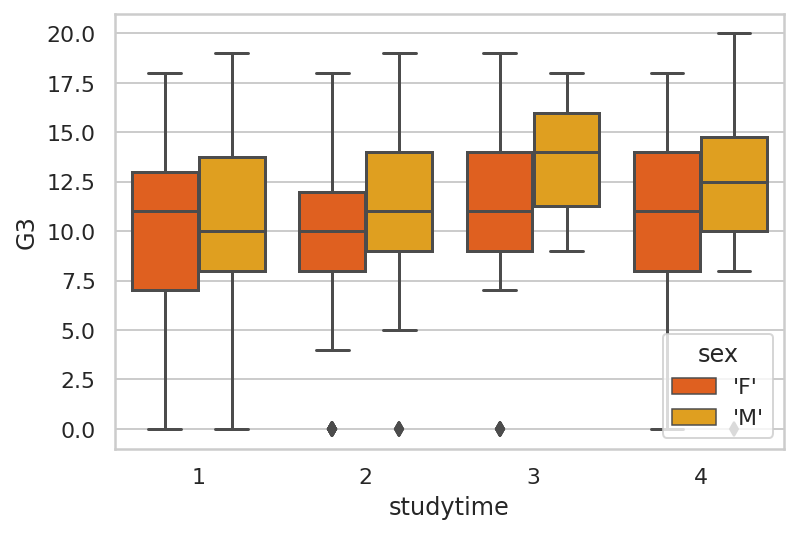

In [23]:
# Let's do a boxplot 
sns.boxplot(x = "studytime", y ="G3", data = df, hue = "sex", palette = "autumn");

In [24]:
# Let's see the correlation of the features

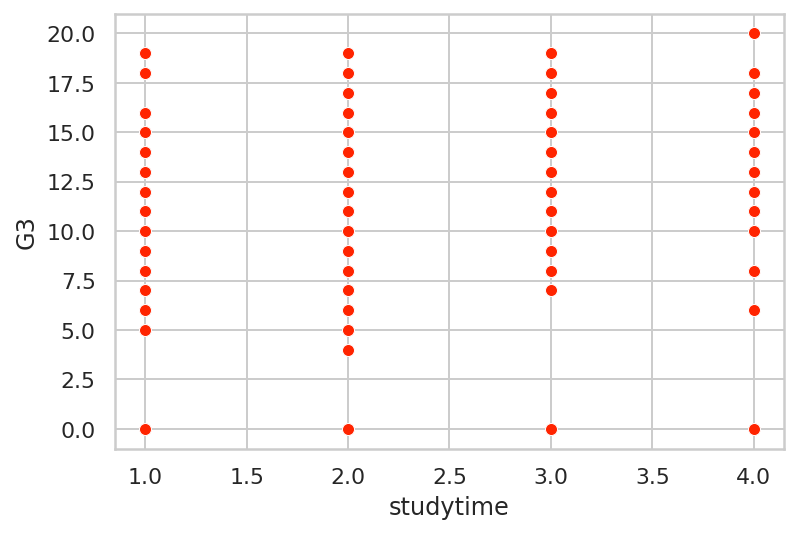

In [25]:
sns.scatterplot(data = df, x = "studytime", y = "G3")

In [26]:
df["studytime"].corr(df["G3"])

0.09781968965319626

In [27]:
# Let's try and fit a model using "studytime" to predict "G3"

In [28]:
import statsmodels.api as sm

formula_string = "G3 ~ studytime"
model = sm.formula.ols(formula = formula_string, data = df)
model_fitted = model.fit()
print(model_fitted.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.797
Date:                Sun, 18 Oct 2020   Prob (F-statistic):             0.0521
Time:                        07:13:12   Log-Likelihood:                -1159.3
No. Observations:                 395   AIC:                             2323.
Df Residuals:                     393   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3283      0.603     15.463      0.0

In [29]:
# From the intercept and the slope value, 
# y_hat (G3) = 9.3283 + 0.5340 * x (studytime)

In [30]:
# Let's also see how good "studytime" is at explaining the variability
model_fitted.rsquared

0.009568691683847552

In [31]:
# Only 0.009%, not sure if that's good or bad

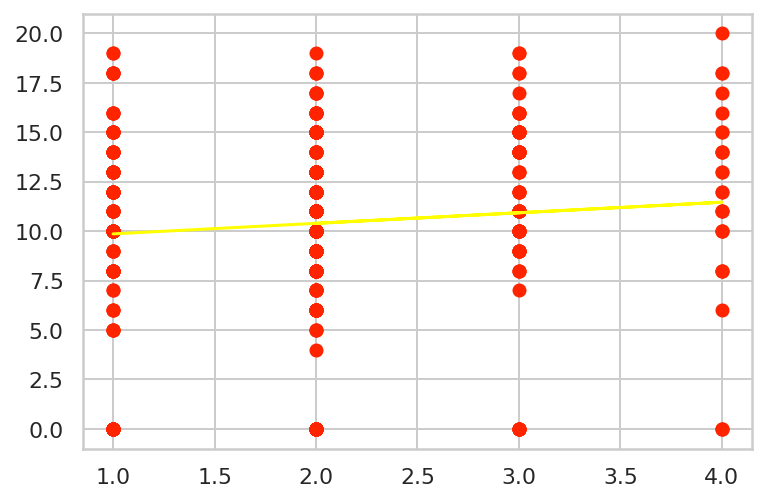

In [32]:
x = df["studytime"]
y = df["G3"]
y_pred = model_fitted.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color = "yellow")
plt.show();

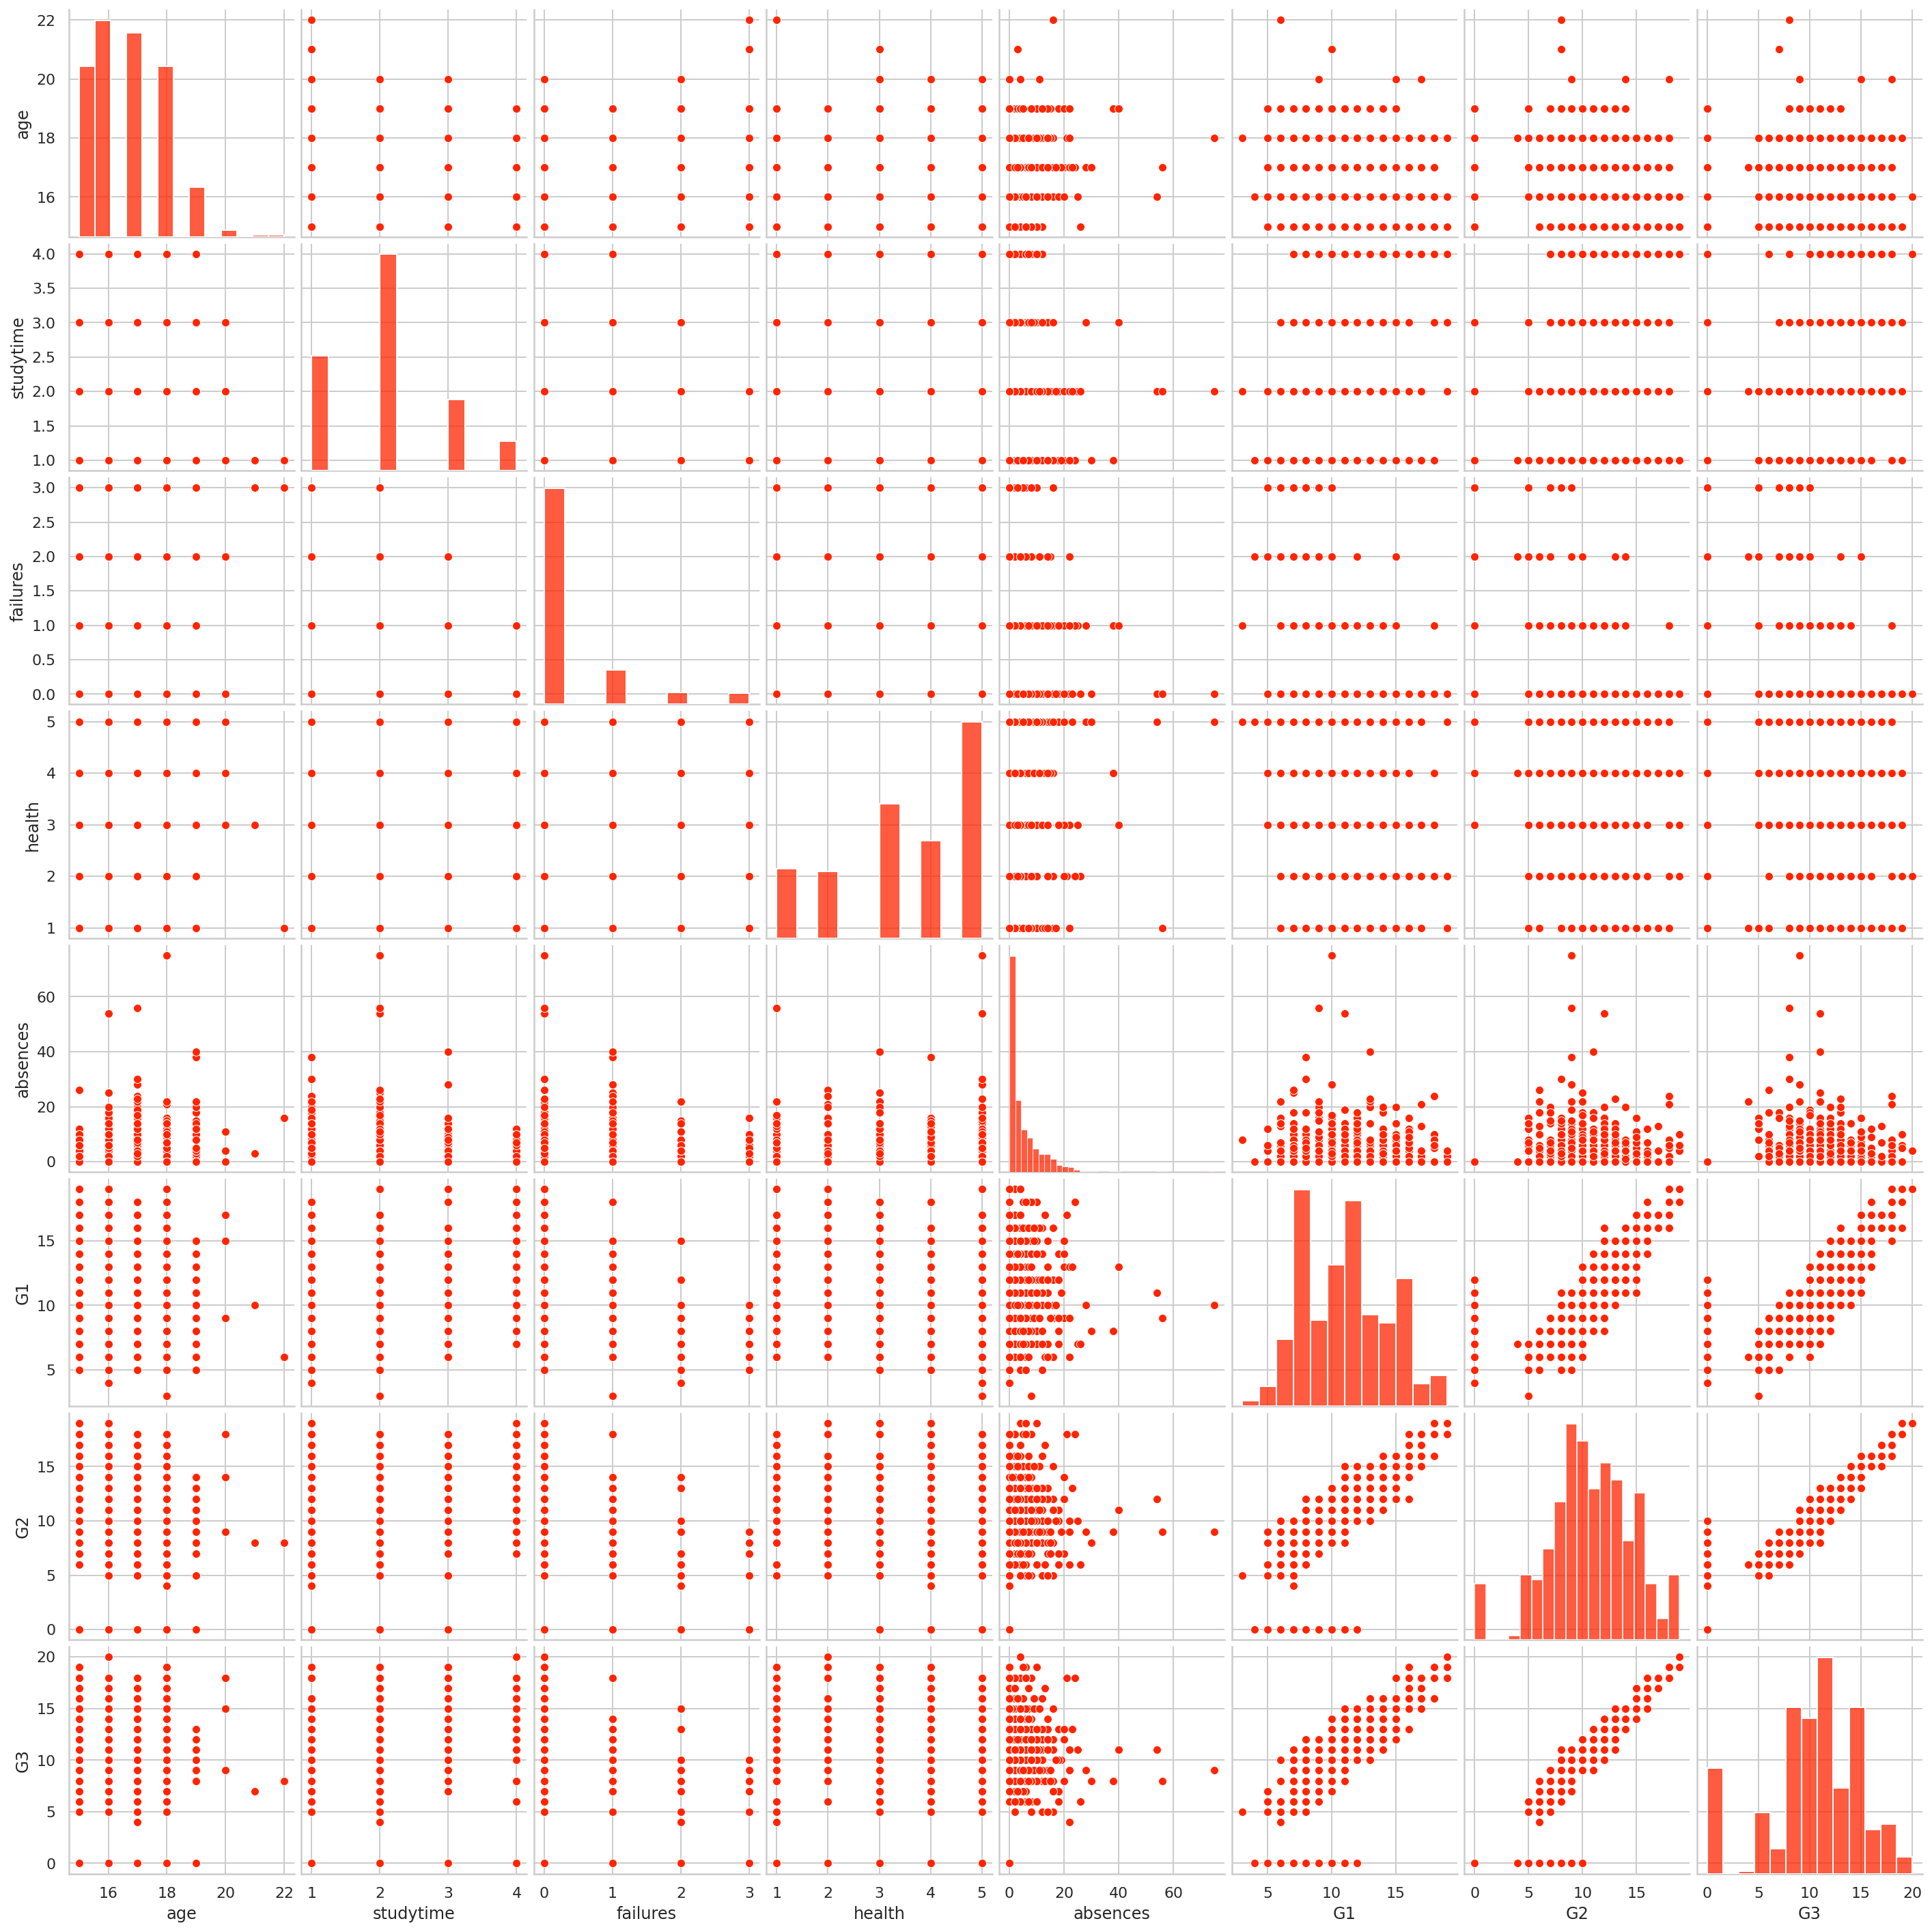

In [33]:
# Let's do a pairplot of all the features
sns.pairplot(df.iloc[:,1:12])
plt.show();

In [34]:
# From the looks of it, the grades have a strong relation, let's assert this
print(df["G1"].corr(df["G2"]))
print(df["G1"].corr(df["G3"]))
print(df["G2"].corr(df["G3"]))

0.852118066364806
0.8014679320174145
0.904867989269301
